<a href="https://colab.research.google.com/github/snehal010/010/blob/main/Mall_customer_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers (3).csv


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('Mall_Customers.csv')

In [ ]:
df.shape

(200, 5)

In [ ]:
df.size

1000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.columns = df.columns.str.strip().str.lower()

In [ ]:
df.head()

,customerid,gender,age,annual income (k$),spending score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.columns = (
    df.columns
    .str.strip()
    .str.lower().str.replace(r"[()$]","",regex=True)
    .str.replace("_","_")
    .str.replace(" ","_")

  )

In [ ]:
df.columns

Index(['customerid', 'gender', 'age', 'annual_income_k',
       'spending_score_1-100'],
      dtype='object')

In [ ]:
df.describe()

,customerid,age,annual_income_k,spending_score_1-100
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
x = df[['annual_income_k','spending_score_1-100']]
x.head()

,annual_income_k,spending_score_1-100
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [ ]:
#since there is no label, the model can use only is distence between the points

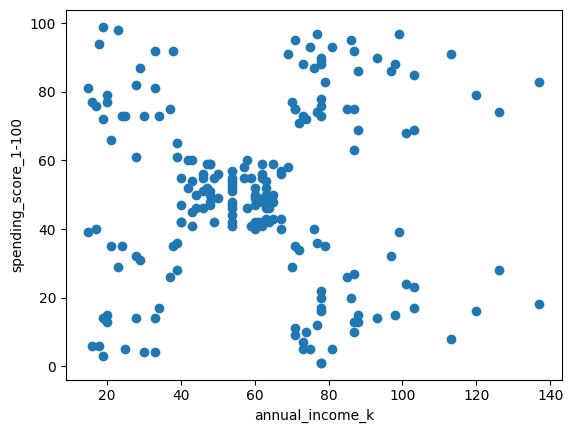

In [ ]:
#visualising raw data
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x['annual_income_k'],x['spending_score_1-100'])
plt.xlabel('annual_income_k')
plt.ylabel('spending_score_1-100')
plt.show()

In [ ]:
# k means tries to group points so that points in the
# same group are close to each other

#from sklearn.cluster import KMeans
#k_means = KMeans(n_clusters=5)
#labels = k_means.fit_predict(x)


# n_cluster , devide the customer into 5 groups
# fit (x) - looks at all data points in x, place
# 5 random centriods

#assigns each point to center of assigned  points in
# iteration
# reapeats untill stable
# for each data point returns which cluster it belongs to
# represents them with numeric values

In [ ]:
#labels[:10]

In [ ]:
#df["cluster"] = labels
#df.head()

In [ ]:
# visualize cluster

#plt.scatter(
#    x['annual_income_k'],
#    x['spending_score_1-100'],
#    c=labels
#)

#plt.xlabel('annual_income_k')
 #plt.ylabel('spending_score_1-100')
#plt.title('custmer segment')
#plt.show()

In [ ]:
from numpy._core.defchararray import lower
# elbow method
# it help to find how many groups to use

from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
  k_means = KMeans(n_clusters=k, random_state=42)
  k_means.fit(x)
  wcss.append(k_means.inertia_)

  #wcss - Within cluster sum of squares
  #lower wcss - tightly clusteres
  #higher wcss - messy clusteres

 # we will store this for each kmeans
 #each loop new model different number of clusters

 #in each loop k increases, wcss decreases and improvement
 #slows down after certain point

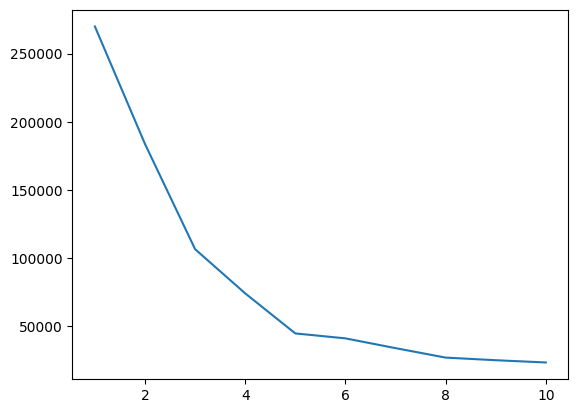

In [ ]:
plt.plot(range(1,11),wcss)


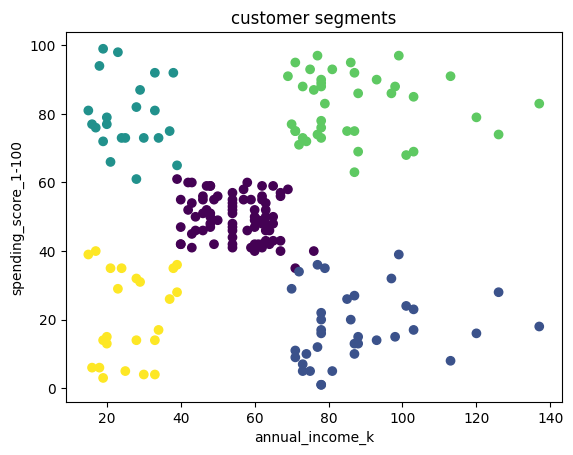

In [ ]:
plt.scatter(x['annual_income_k'],x['spending_score_1-100'],c=labels)

plt.xlabel('annual_income_k')
plt.ylabel('spending_score_1-100')
plt.title('customer segments')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
kmeans_model=KMeans(n_clusters=10,random_state=42)
label=kmeans_model.fit_predict(x)

In [ ]:
label[:10]

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2], dtype=int32)

In [ ]:
df["cluster"]=label
df.head()

,customerid,gender,age,annual_income_k,spending_score_1-100,cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


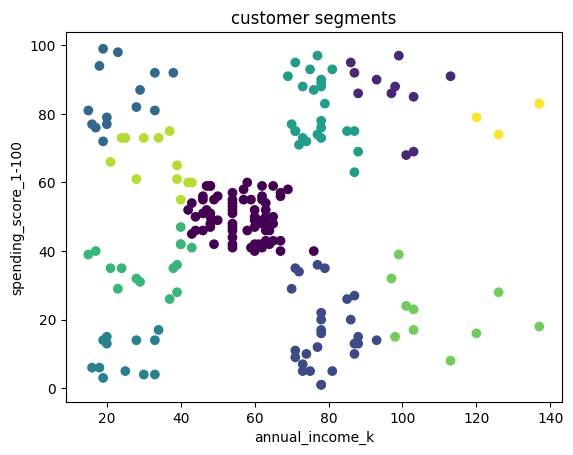

In [ ]:
plt.scatter(x['annual_income_k'],x['spending_score_1-100'],c=label)

plt.xlabel('annual_income_k')
plt.ylabel('spending_score_1-100')
plt.title('customer segments')
plt.show()

In [ ]:
# applting PCA here
# Principal Compound Analysis - PCA

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(x)
x_pca = pca.transform(x)

# components = 2 - reducing data 2 diamentions,
# informations presearved mostly

# PCA are used when data has many feature,
# so pca compress information then we visible it
# pca does not create clusters, it helps us see them

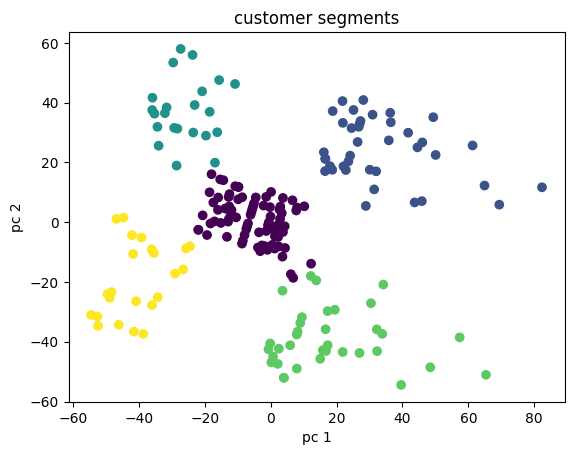

In [ ]:
# visualize clusters using
plt.scatter(
    x_pca[:,0],
    x_pca[:,1],
    c=df['cluster']
)
plt.xlabel('pc 1')
plt.ylabel('pc 2')
plt.title('customer segments')
plt.show()

In [ ]:
df.groupby('cluster')[['annual_income_k','spending_score_1-100']].mean()

,annual_income_k,spending_score_1-100
cluster,,
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


In [ ]:
df['segment'] = df['cluster'].map({
    0:'mid income-mid speed',
    1:'high income-high speed',
    2:'low income-high speed',
    3:'high income-low speed',
    4:'low income-low speed',
})

In [ ]:
df.head()

,customerid,gender,age,annual_income_k,spending_score_1-100,cluster,segment
0,1,Male,19,15,39,4,low income-low speed
1,2,Male,21,15,81,2,low income-high speed
2,3,Female,20,16,6,4,low income-low speed
3,4,Female,23,16,77,2,low income-high speed
4,5,Female,31,17,40,4,low income-low speed


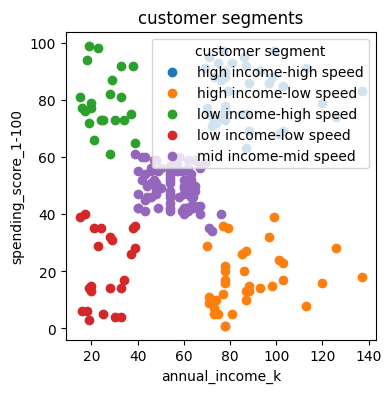

In [ ]:
plt.figure(figsize=(4,4))
for segment_name, group in df.groupby('segment'):
    plt.scatter(
        group['annual_income_k'],
        group['spending_score_1-100'],
        label=segment_name
    )

plt.xlabel('annual_income_k')
plt.ylabel('spending_score_1-100')
plt.title('customer segments')
plt.legend(title='customer segment')
plt.show()

In [ ]:
# more aproved or rejected?
# bar chart of loan status
# box plot for loan amount
# which group has higher loan aprroval
# which feature looks important for loan aprroval